# Play tennies prediction using Decision tree 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


In [6]:
# -----------------------------
# 1. Load the dataset
# -----------------------------

df = pd.read_csv("D:/dip(AIML(cse))/kaggle/Play Tennis.csv")
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [7]:
# -----------------------------
# 2. Preprocessing
# -----------------------------
X = df.drop(columns=['Day','Play_Tennis'])
y = df['Play_Tennis']

In [8]:
# Convert categorical features into numeric (One-Hot Encoding)
X = pd.get_dummies(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)   # Yes=1, No=0


In [9]:
X.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temprature_Cool,Temprature_Hot,Temprature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True


In [10]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [11]:

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [12]:
# -----------------------------
# 3. Decision Tree
# -----------------------------
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)

print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.4


In [13]:
# Plot tree only for reference, not mandatory
#plt.figure(figsize=(12,8))
#plot_tree(dtc, feature_names=X.columns, class_names=le.classes_, filled=True)
#plt.show()

In [14]:
# -----------------------------
# 4. Random Forest
# -----------------------------
rfc = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.4


# Breast cancer prediction using Decision tree

In [15]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer

In [16]:

cancer_data = load_breast_cancer()

In [17]:
type(cancer_data)  # Note:since we are not using pandas to read data , "cancer_data" is not a dataframe

sklearn.utils._bunch.Bunch

In [18]:
list(cancer_data.target_names)

['malignant', 'benign']

In [19]:
cancer_data.feature_names # Study about cancer data in Kaggle or UCI website

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
# convert the data to dataframe 
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_df, 
                                                    cancer_data.target, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [23]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9095744680851063


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 63,   4],
       [ 13, 108]], dtype=int64)

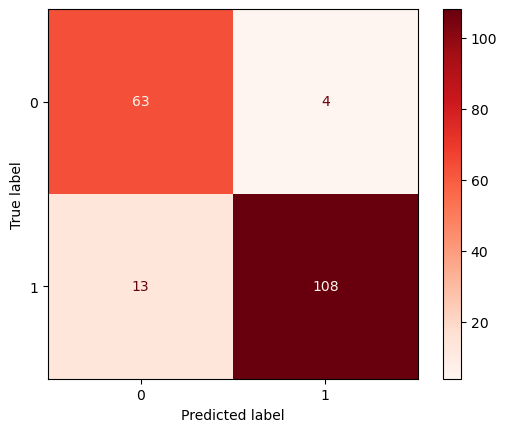

In [26]:
# You can also plot confusion matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
 
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        67
           1       0.96      0.89      0.93       121

    accuracy                           0.91       188
   macro avg       0.90      0.92      0.90       188
weighted avg       0.92      0.91      0.91       188



#  Using Random forest classifier for comparision 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_df, 
                                                    cancer_data.target, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [29]:
from sklearn.ensemble import RandomForestClassifier  
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


# If you want you can check acc for training datra also
#print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train))) 

#Predict the response for test dataset
y_pred = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9521276595744681


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 61,   6],
       [  3, 118]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

